In [5]:
import os
import sqlalchemy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
person_data = pd.read_csv("data_covid.csv")

,person_id,cov_dt,category,race_name,gen_name,current_age,measurement_name,measurement_date,value_as_number,unit_name
0,41,2020-03-04,mild,White,FEMALE,37.0,Diastolic blood pressure,2020-03-04,71.0,millimeter mercury column
1,41,2020-03-04,mild,White,FEMALE,37.0,Body temperature,2020-03-04,41.6,degree Celsius
2,41,2020-03-04,mild,White,FEMALE,37.0,Respiratory rate,2020-03-04,25.5,per minute
3,41,2020-03-04,mild,White,FEMALE,37.0,Oxygen saturation in Arterial blood,2020-03-04,88.6,percent
4,41,2020-03-04,mild,White,FEMALE,37.0,Systolic blood pressure,2020-03-04,115.0,millimeter mercury column
...,...,...,...,...,...,...,...,...,...,...
208432,124114,2020-03-13,mild,White,MALE,34.0,Body weight,2020-03-13,80.5,kilogram
208433,124114,2020-03-13,mild,White,MALE,34.0,Systolic blood pressure,2020-03-13,128.0,millimeter mercury column
208434,124114,2020-03-13,mild,White,MALE,34.0,Oxygen saturation in Arterial blood,2020-03-13,81.7,percent
208435,124114,2020-03-13,mild,White,MALE,34.0,Respiratory rate,2020-03-13,17.2,per minute


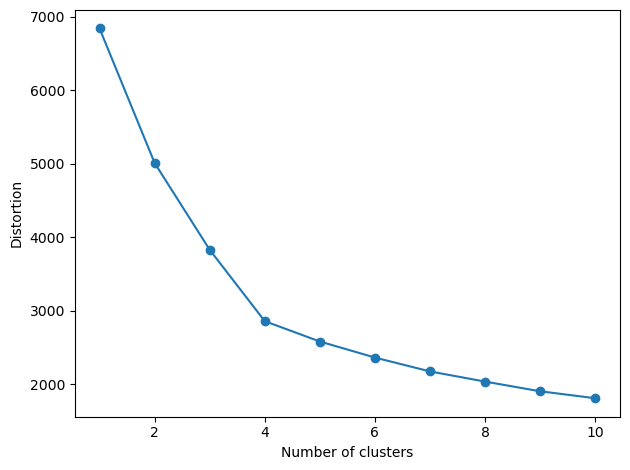

In [406]:
covid_data = pd.read_csv("data_covid.csv")  
# Convert measurement_date to datetime
covid_data['measurement_date'] = pd.to_datetime(covid_data['measurement_date'])

# Keep only the measurements from the first day
first_day_data = covid_data[covid_data['measurement_date'] == covid_data.groupby('person_id')['measurement_date'].transform('min')]

# Pivot the data so that each measurement is a separate column
first_day_pivot = first_day_data.pivot_table(index=['person_id', 'current_age', 'category', 'race_name', 'gen_name'], 
                                             columns='measurement_name', 
                                             values='value_as_number').reset_index()

# Select relevant features (labs and vitals)
selected_features = [
    'Diastolic blood pressure', 'Body temperature',
    'Systolic blood pressure', 'Body weight']

# Subset the data to include only the selected features
patient_df = first_day_pivot[['person_id', 'current_age', 'category', 'race_name', 'gen_name'] + selected_features]

# Univariate imputation (mean or median)
# Median imputation
patient_df.loc[:, selected_features] = patient_df[selected_features].fillna(patient_df[selected_features].median())

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(patient_df[selected_features])

# Perform KMeans clustering
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(scaled_features)
    distortions.append(km.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()


In [407]:
first_day_pivot

measurement_name,person_id,current_age,category,race_name,gen_name,Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Albumin [Mass/volume] in Serum or Plasma,Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma,Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Bilirubin.total [Mass/volume] in Serum or Plasma,...,Hemoglobin [Mass/volume] in Blood,Leukocytes [#/volume] in Blood by Automated count,MCH [Entitic mass] by Automated count,MCHC [Mass/volume] by Automated count,MCV [Entitic volume] by Automated count,Oxygen saturation in Arterial blood,Platelets [#/volume] in Blood by Automated count,Protein [Mass/volume] in Serum or Plasma,Respiratory rate,Systolic blood pressure
0,41,37.0,mild,White,FEMALE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88.60,NaN,NaN,25.50,115.0
1,114,57.0,mild,White,FEMALE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88.60,NaN,NaN,14.10,123.0
2,154,56.0,moderate,Black or African American,FEMALE,14.6,3.9,41.2,10.7,14.1,...,13.9,4.0,28.9,31.6,85.8,80.25,136.3,6.8,25.65,114.5
3,282,26.0,mild,White,MALE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,78.50,NaN,NaN,35.70,115.0
4,394,17.0,mild,White,FEMALE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,87.70,NaN,NaN,29.90,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,123852,47.0,mild,White,MALE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,78.50,NaN,NaN,38.70,118.0
1706,123879,46.0,moderate,White,FEMALE,43.2,5.0,80.6,9.8,9.5,...,12.5,3.5,28.5,33.1,93.3,80.55,133.4,6.5,23.35,139.0
1707,123896,50.0,mild,White,FEMALE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,80.20,NaN,NaN,25.30,119.0
1708,123955,72.0,mild,White,MALE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,85.50,NaN,NaN,32.80,136.0


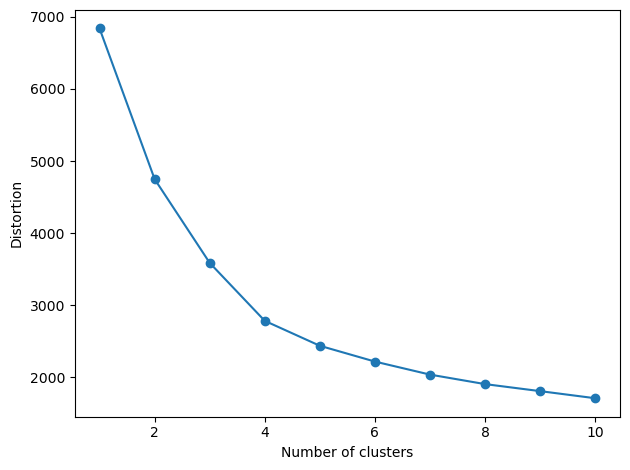

In [400]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load COVID-19 dataset
covid_data = pd.read_csv("data_covid.csv")  

# Pivot the data so that each measurement is a separate column
covid_data_pivot = covid_data.pivot_table(index=['person_id', 'current_age', 'category', 'race_name', 'gen_name'], 
                                          columns='measurement_name', 
                                          values='value_as_number', 
                                          aggfunc='mean').reset_index()

# Select relevant features (labs and vitals)
selected_features = [
 'Diastolic blood pressure', 'Body temperature' ,#'Respiratory rate',
 #'Oxygen saturation in Arterial blood', 
 'Systolic blood pressure',
 'Body weight']#, 'Heart rate']
 #'Bilirubin.total [Mass/volume] in Serum or Plasma',
 #'Hemoglobin [Mass/volume] in Blood',
 #'Platelets [#/volume] in Blood by Automated count',
 #'Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum, Plasma or Blood by Creatinine-based formula (MDRD)',
 #'Protein [Mass/volume] in Serum or Plasma',
 #'Leukocytes [#/volume] in Blood by Automated count']
 

# Subset the data to include only the selected features
patient_df = covid_data_pivot[['person_id', 'current_age', 'category', 'race_name', 'gen_name'] + selected_features]


# Univariate imputation (mean or median)
# Median imputation
patient_df.loc[:, selected_features] = patient_df[selected_features].fillna(patient_df[selected_features].median())
#patient_df.dropna(inplace=True)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(patient_df[selected_features])


distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(scaled_features)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()




In [361]:
patient_df

measurement_name,person_id,current_age,category,race_name,gen_name,Diastolic blood pressure,Body temperature,Systolic blood pressure,Body weight
0,41,37.0,mild,White,FEMALE,71.000000,41.600000,115.000000,100.700000
1,114,57.0,mild,White,FEMALE,80.000000,38.200000,123.000000,70.300000
2,154,56.0,moderate,Black or African American,FEMALE,77.333333,40.200000,116.000000,75.053333
3,282,26.0,mild,White,MALE,84.000000,41.500000,115.000000,97.500000
4,394,17.0,mild,White,FEMALE,79.000000,39.000000,120.000000,57.800000
...,...,...,...,...,...,...,...,...,...
1705,123852,47.0,mild,White,MALE,73.000000,38.100000,118.000000,103.600000
1706,123879,46.0,moderate,White,FEMALE,80.461538,40.238462,121.615385,85.369231
1707,123896,50.0,mild,White,FEMALE,83.000000,38.500000,119.000000,73.400000
1708,123955,72.0,mild,White,MALE,75.000000,39.200000,136.000000,86.400000


measurement_name  Diastolic blood pressure  Body temperature  \
cluster                                                        
0                                79.547415         39.878852   
1                                78.888159         40.925841   
2                                79.740323         39.305105   
3                               105.603731         39.807238   

measurement_name  Systolic blood pressure  Body weight  
cluster                                                 
0                              120.420885    28.140232  
1                              119.322471    80.351763  
2                              119.096920    81.520840  
3                              171.057030    81.545669  


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_791323/2147236918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_df['cluster'] = kmeans.fit_predict(scaled_features)


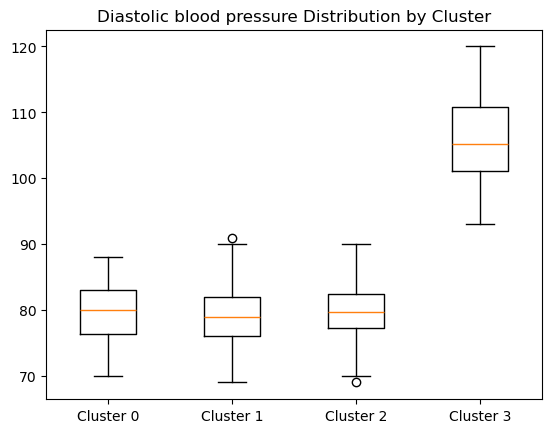

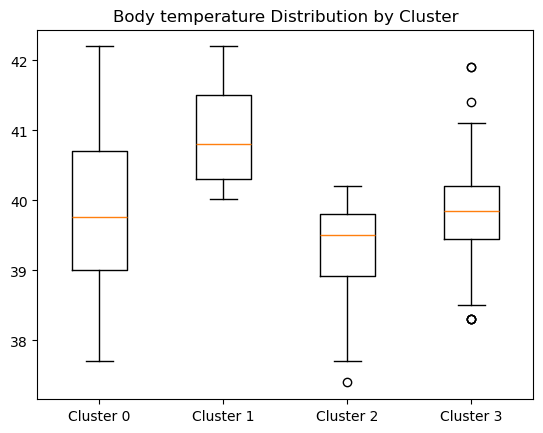

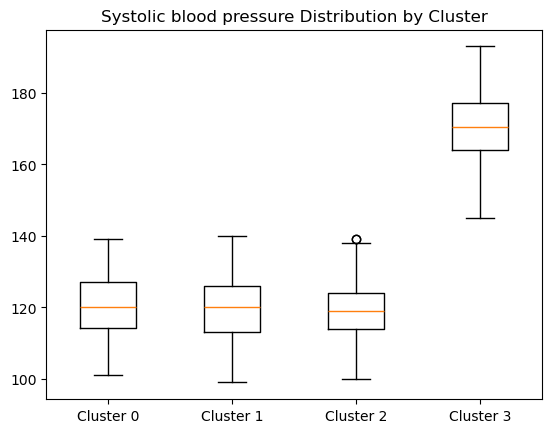

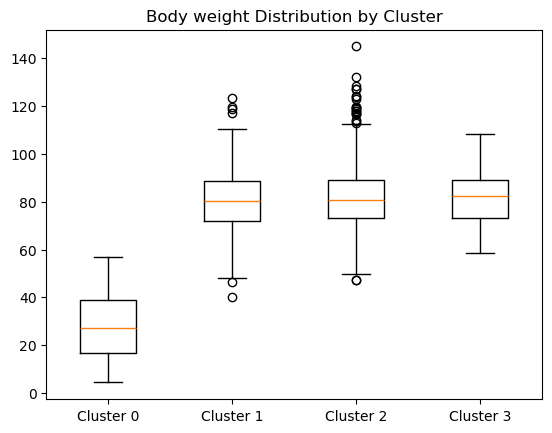

In [362]:
# From the elbow curve, determine the optimal value of k
optimal_k = 4

# Perform clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
patient_df['cluster'] = kmeans.fit_predict(scaled_features)

# Summary statistics for each cluster
cluster_summary = patient_df.groupby('cluster')[selected_features].mean()
print(cluster_summary)

# Visualization (box plots)
for feature in selected_features:
    plt.figure()
    plt.boxplot([patient_df[patient_df['cluster'] == i][feature] for i in range(optimal_k)])
    plt.xticks(range(1, optimal_k+1), [f'Cluster {i}' for i in range(optimal_k)])
    plt.title(f'{feature} Distribution by Cluster')
    plt.show()

In [363]:
# Summary statistics for each cluster
for i in range(optimal_k):
    print(f"Cluster {i}:")
    print(patient_df[patient_df['cluster'] == i][selected_features].describe())
    print("\n")

Cluster 0:
measurement_name  Diastolic blood pressure  Body temperature  \
count                           234.000000        234.000000   
mean                             79.547415         39.878852   
std                               4.247155          1.143916   
min                              70.000000         37.700000   
25%                              76.355769         39.000000   
50%                              80.000000         39.770000   
75%                              83.000000         40.700000   
max                              88.000000         42.200000   

measurement_name  Systolic blood pressure  Body weight  
count                          234.000000   234.000000  
mean                           120.420885    28.140232  
std                              8.774028    13.765238  
min                            101.000000     4.400000  
25%                            114.200000    16.525000  
50%                            120.000000    27.150000  
75%          

In [409]:
# Add cluster labels to original data
patient_df.loc[:, 'cluster'] = kmeans.labels_
#covid_data_pivot.loc[:, 'cluster'] = kmeans.labels_

In [410]:
# Calculate average age within each cluster
average_age = patient_df.groupby('cluster')['current_age'].mean()
average_age

cluster
0    12.457265
1    52.082353
2    54.773942
3    56.102941
Name: current_age, dtype: float64

In [404]:
# Total number of patients
total_patients = patient_df['person_id'].nunique()

# Gender distribution
gender_distribution = patient_df['gen_name'].value_counts()

# Age distribution
age_distribution = patient_df['current_age'].describe()

# Race distribution
race_distribution = patient_df['race_name'].value_counts()

print("Total number of patients:", total_patients)
print("\nGender distribution:")
print(gender_distribution)
print("\nAge distribution:")
print(age_distribution)
print("\nRace distribution:")
print(race_distribution)


Total number of patients: 1710

Gender distribution:
gen_name
FEMALE    889
MALE      821
Name: count, dtype: int64

Age distribution:
count    1710.000000
mean       48.233333
std        24.805668
min         4.000000
25%        27.000000
50%        50.000000
75%        66.000000
max       113.000000
Name: current_age, dtype: float64

Race distribution:
race_name
White                        1450
Black or African American     132
Asian                         117
No matching concept            11
Name: count, dtype: int64


In [386]:
# Calculate distribution of gender within each cluster
category_distribution = patient_df.groupby('cluster')['category'].value_counts(normalize=True)
category_distribution

cluster  category
0        mild        0.854701
         moderate    0.136752
         severe      0.008547
1        mild        0.711765
         moderate    0.152941
         severe      0.135294
2        mild        0.439866
         moderate    0.419822
         severe      0.140312
3        moderate    0.397059
         mild        0.352941
         severe      0.250000
Name: proportion, dtype: float64

In [387]:
# Calculate distribution of gender within each cluster
gender_distribution = patient_df.groupby('cluster')['gen_name'].value_counts(normalize=True)
gender_distribution

cluster  gen_name
0        FEMALE      0.606838
         MALE        0.393162
1        FEMALE      0.523529
         MALE        0.476471
2        FEMALE      0.500000
         MALE        0.500000
3        MALE        0.544118
         FEMALE      0.455882
Name: proportion, dtype: float64

In [389]:
# Calculate distribution of race within each cluster
race_distribution = patient_df.groupby('cluster')['race_name'].value_counts(normalize=True)
race_distribution

cluster  race_name                
0        White                        0.846154
         Asian                        0.081197
         Black or African American    0.068376
         No matching concept          0.004274
1        White                        0.841176
         Black or African American    0.082353
         Asian                        0.070588
         No matching concept          0.005882
2        White                        0.851893
         Black or African American    0.076837
         Asian                        0.063474
         No matching concept          0.007795
3        White                        0.852941
         Asian                        0.073529
         Black or African American    0.073529
Name: proportion, dtype: float64

In [368]:
# Calculate average age within each cluster
average_age = patient_df.groupby('cluster')['current_age'].mean()

# Calculate average and standard deviation of age within each cluster
age_stats = patient_df.groupby('cluster')['current_age'].agg(['mean', 'std'])

# Calculate distribution of race within each cluster
race_distribution = patient_df.groupby(['cluster', 'race_name']).size().unstack(fill_value=0)
race_distribution_percent = race_distribution.div(race_distribution.sum(axis=1), axis=0)

# Calculate distribution of gender within each cluster
gender_distribution = patient_df.groupby(['cluster', 'gen_name']).size().unstack(fill_value=0)
gender_distribution_percent = gender_distribution.div(gender_distribution.sum(axis=1), axis=0)

# Combine all dataframes
summary_df = pd.concat([average_age, age_stats, race_distribution_percent, gender_distribution_percent], axis=1)

# Print the summary dataframe
print(summary_df)


         current_age       mean        std     Asian  \
cluster                                                
0          12.457265  12.457265   9.086157  0.081197   
1          52.082353  52.082353  22.527283  0.070588   
2          54.773942  54.773942  21.237393  0.063474   
3          56.102941  56.102941  17.183939  0.073529   

         Black or African American  No matching concept     White    FEMALE  \
cluster                                                                       
0                         0.068376             0.004274  0.846154  0.606838   
1                         0.082353             0.005882  0.841176  0.523529   
2                         0.076837             0.007795  0.851893  0.500000   
3                         0.073529             0.000000  0.852941  0.455882   

             MALE  
cluster            
0        0.393162  
1        0.476471  
2        0.500000  
3        0.544118  


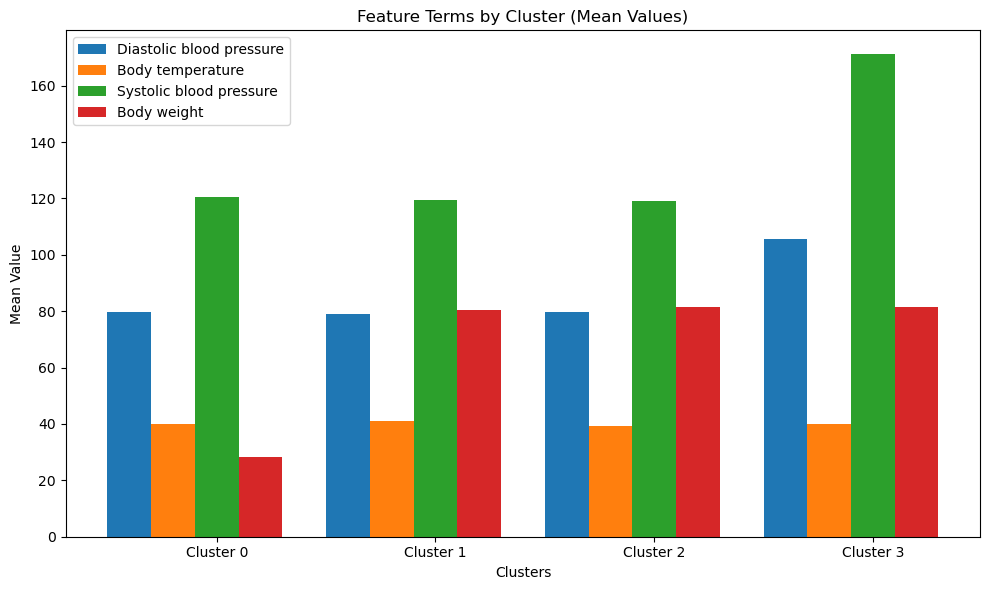

In [370]:
import matplotlib.pyplot as plt
import numpy as np

clusters = [0, 1, 2, 3]  # Cluster labels
feature_terms = ['Diastolic blood pressure', 'Body temperature', 
                 'Systolic blood pressure', 'Body weight']

# Mean values for each term within each cluster
mean_values_cluster1 = [79.547415, 39.878852, 120.420885, 28.140232]
mean_values_cluster2 = [78.888159, 40.925841, 119.322471, 80.351763]
mean_values_cluster3 = [79.740323, 39.305105, 119.096920, 81.52084]
mean_values_cluster4 = [105.603731, 39.807238, 171.05703, 81.545669]

# Create the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.2
for i, term in enumerate(feature_terms):
    plt.bar(np.array(clusters) + i * bar_width, 
            [mean_values_cluster1[i], mean_values_cluster2[i], mean_values_cluster3[i], mean_values_cluster4[i]], 
            width=bar_width, label=term)

plt.xlabel('Clusters')
plt.ylabel('Mean Value')
plt.xticks(np.array(clusters) + (len(feature_terms) / 2) * bar_width, [f'Cluster {c}' for c in clusters])
plt.title('Feature Terms by Cluster (Mean Values)')
plt.legend()
plt.tight_layout()
plt.show()


In [397]:
import matplotlib.pyplot as plt

# List of lab measurements
lab_measurements = ['Diastolic blood pressure', 'Body temperature', 'Respiratory rate',
                    'Oxygen saturation in Arterial blood', 'Systolic blood pressure',
                    'Body weight', 'Heart rate',
                    'Hematocrit [Volume Fraction] of Blood by Automated count',
                    'Erythrocytes [#/volume] in Blood by Automated count',
                    'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
                    'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
                    'Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma',
                    'Bilirubin.total [Mass/volume] in Serum or Plasma',
                    'Albumin [Mass/volume] in Serum or Plasma',
                    'MCHC [Mass/volume] by Automated count',
                    'Hemoglobin [Mass/volume] in Blood',
                    'Platelets [#/volume] in Blood by Automated count',
                    'Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum, Plasma or Blood by Creatinine-based formula (MDRD)',
                    'Protein [Mass/volume] in Serum or Plasma',
                    'MCH [Entitic mass] by Automated count',
                    'MCV [Entitic volume] by Automated count',
                    'Leukocytes [#/volume] in Blood by Automated count']

# Initialize an empty dictionary to store median values for each measurement
median_values = {}

# Compute median for each lab measurement
for lab in lab_measurements:
    median_values[lab] = covid_data_pivot.groupby('cluster')[lab].median()

# Convert dictionary to DataFrame for easier plotting
median_df = pd.DataFrame(median_values)


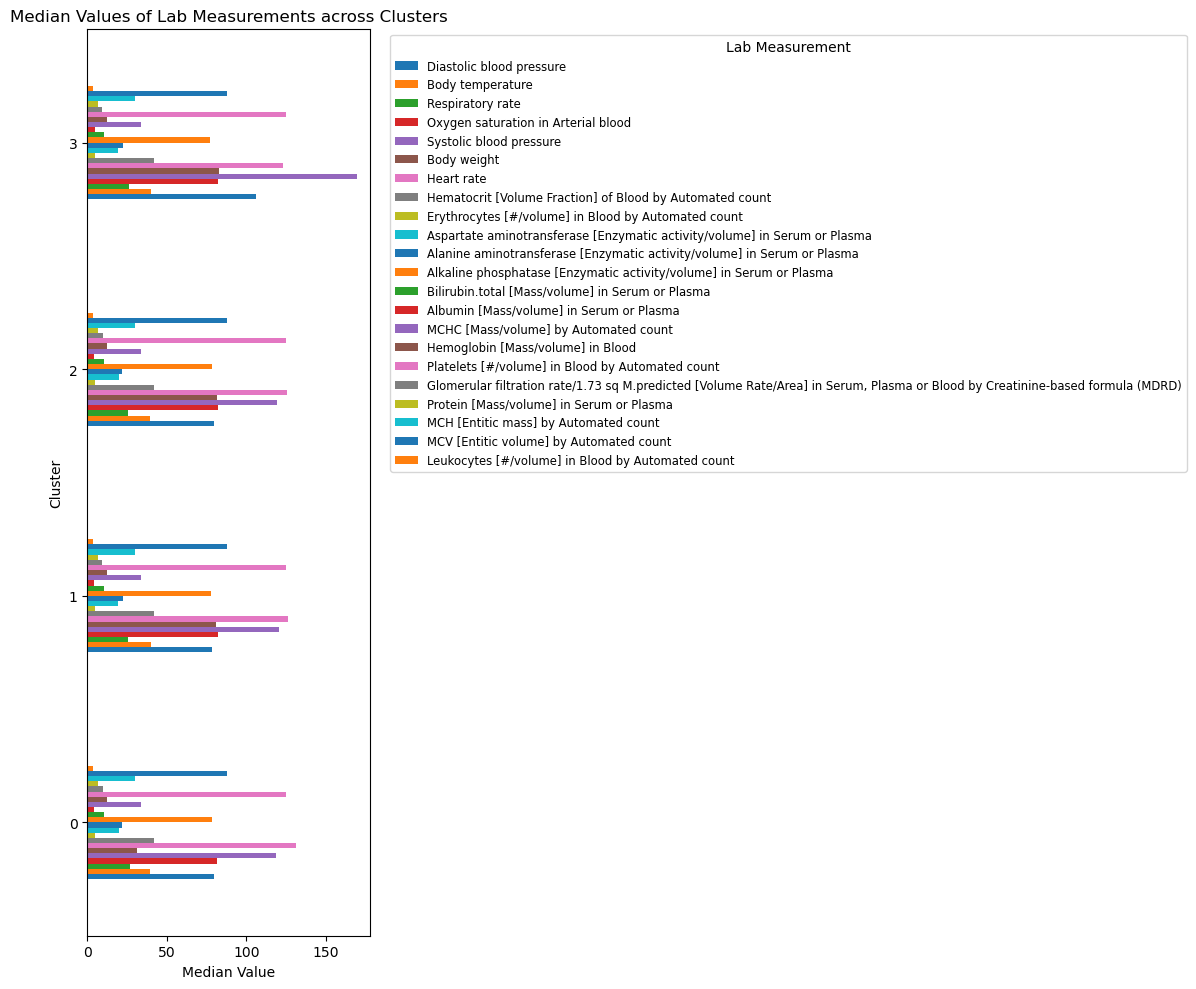

In [396]:
# Plot
median_df.plot(kind='barh', figsize=(12, 10))
plt.title('Median Values of Lab Measurements across Clusters')
plt.xlabel('Median Value')
plt.ylabel('Cluster')
plt.legend(title='Lab Measurement', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

End of Notebook